# Zero to Hero

## 1.14 Montecarlo Estimation mediante for loop

https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo

El objetivo es implementar con un for loop la estimacion montecarlo, que promedia las ganancias

In [1]:
options(warn=-1)

In [2]:
rm( list=ls())
gc()

library("data.table")   #cargo la libreria  data.table
library("rpart")  #cargo la libreria  rpart
library("rpart.plot")
library("caret")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,474591,25.4,1045018,55.9,621911,33.3
Vcells,876341,6.7,8388608,64.0,1601322,12.3


Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
options(repr.plot.width = 20, repr.plot.height = 10) 
setwd("C:\\Users\\oliva\\OneDrive\\Desktop\\DS\\Austral\\08 - Labo1") #Aqui se debe poner la ruta de la PC local

La funcion que definimos en el notebook anterior

In [12]:
GananciaArbol  <-  function( semilla, data, x, train=0.70) {
  #establezco la semilla
  set.seed(semilla) 
  train_rows <- createDataPartition(dataset$clase_ternaria, p= 0.70,list= FALSE)
  
  modelo <-  rpart::rpart(formula= "clase_ternaria ~ ." ,
                          data= data[ train_rows],  #los datos de training
                          xval= 0,
                          control= x)
    
  #Aplico el modelo a los datos de testing  
  prediccion  <- predict( modelo, data[ -train_rows], type = "prob")
    
  #grafico el modelo
  prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0)  
  
  prob_baja2  <- prediccion[, "BAJA+2"]
  ganancia_testing <- data[ -train_rows, sum(  (prob_baja2>1/60) * ifelse( clase_ternaria=="BAJA+2", 59000, -1000) )]

  #normalizo la ganancia
  ganancia_testing_normalizada  <- ganancia_testing/0.3  

  return( ganancia_testing_normalizada )
}

In [13]:
dataset <- fread("./labo/datasets/paquete_premium_202011.csv")   #cargo el dataset
#colnames(dataset)
dataset <- subset( dataset, select = -ctrx_quarter )

In [14]:
#defino unos buenos hiperparametros
param  <- list("cp"= -0.5,
               "minsplit"=  900,
               "minbucket"= 440,
               "maxdepth"= 5 )

#directorio pdf
dir.create( "./labo/exp/montecarlo/", showWarnings = FALSE )

#aqui es donde voy a graficar los arboles
pdf( "./labo/exp/montecarlo/arbolitos.pdf", paper="a4r" )

In [15]:
#defino el vector de semillas
ksemillas <- c(477293) #reemplazar por las propias semillas

vector_ganancias <- c()  #vector donde voy a ir acumulando las ganancias

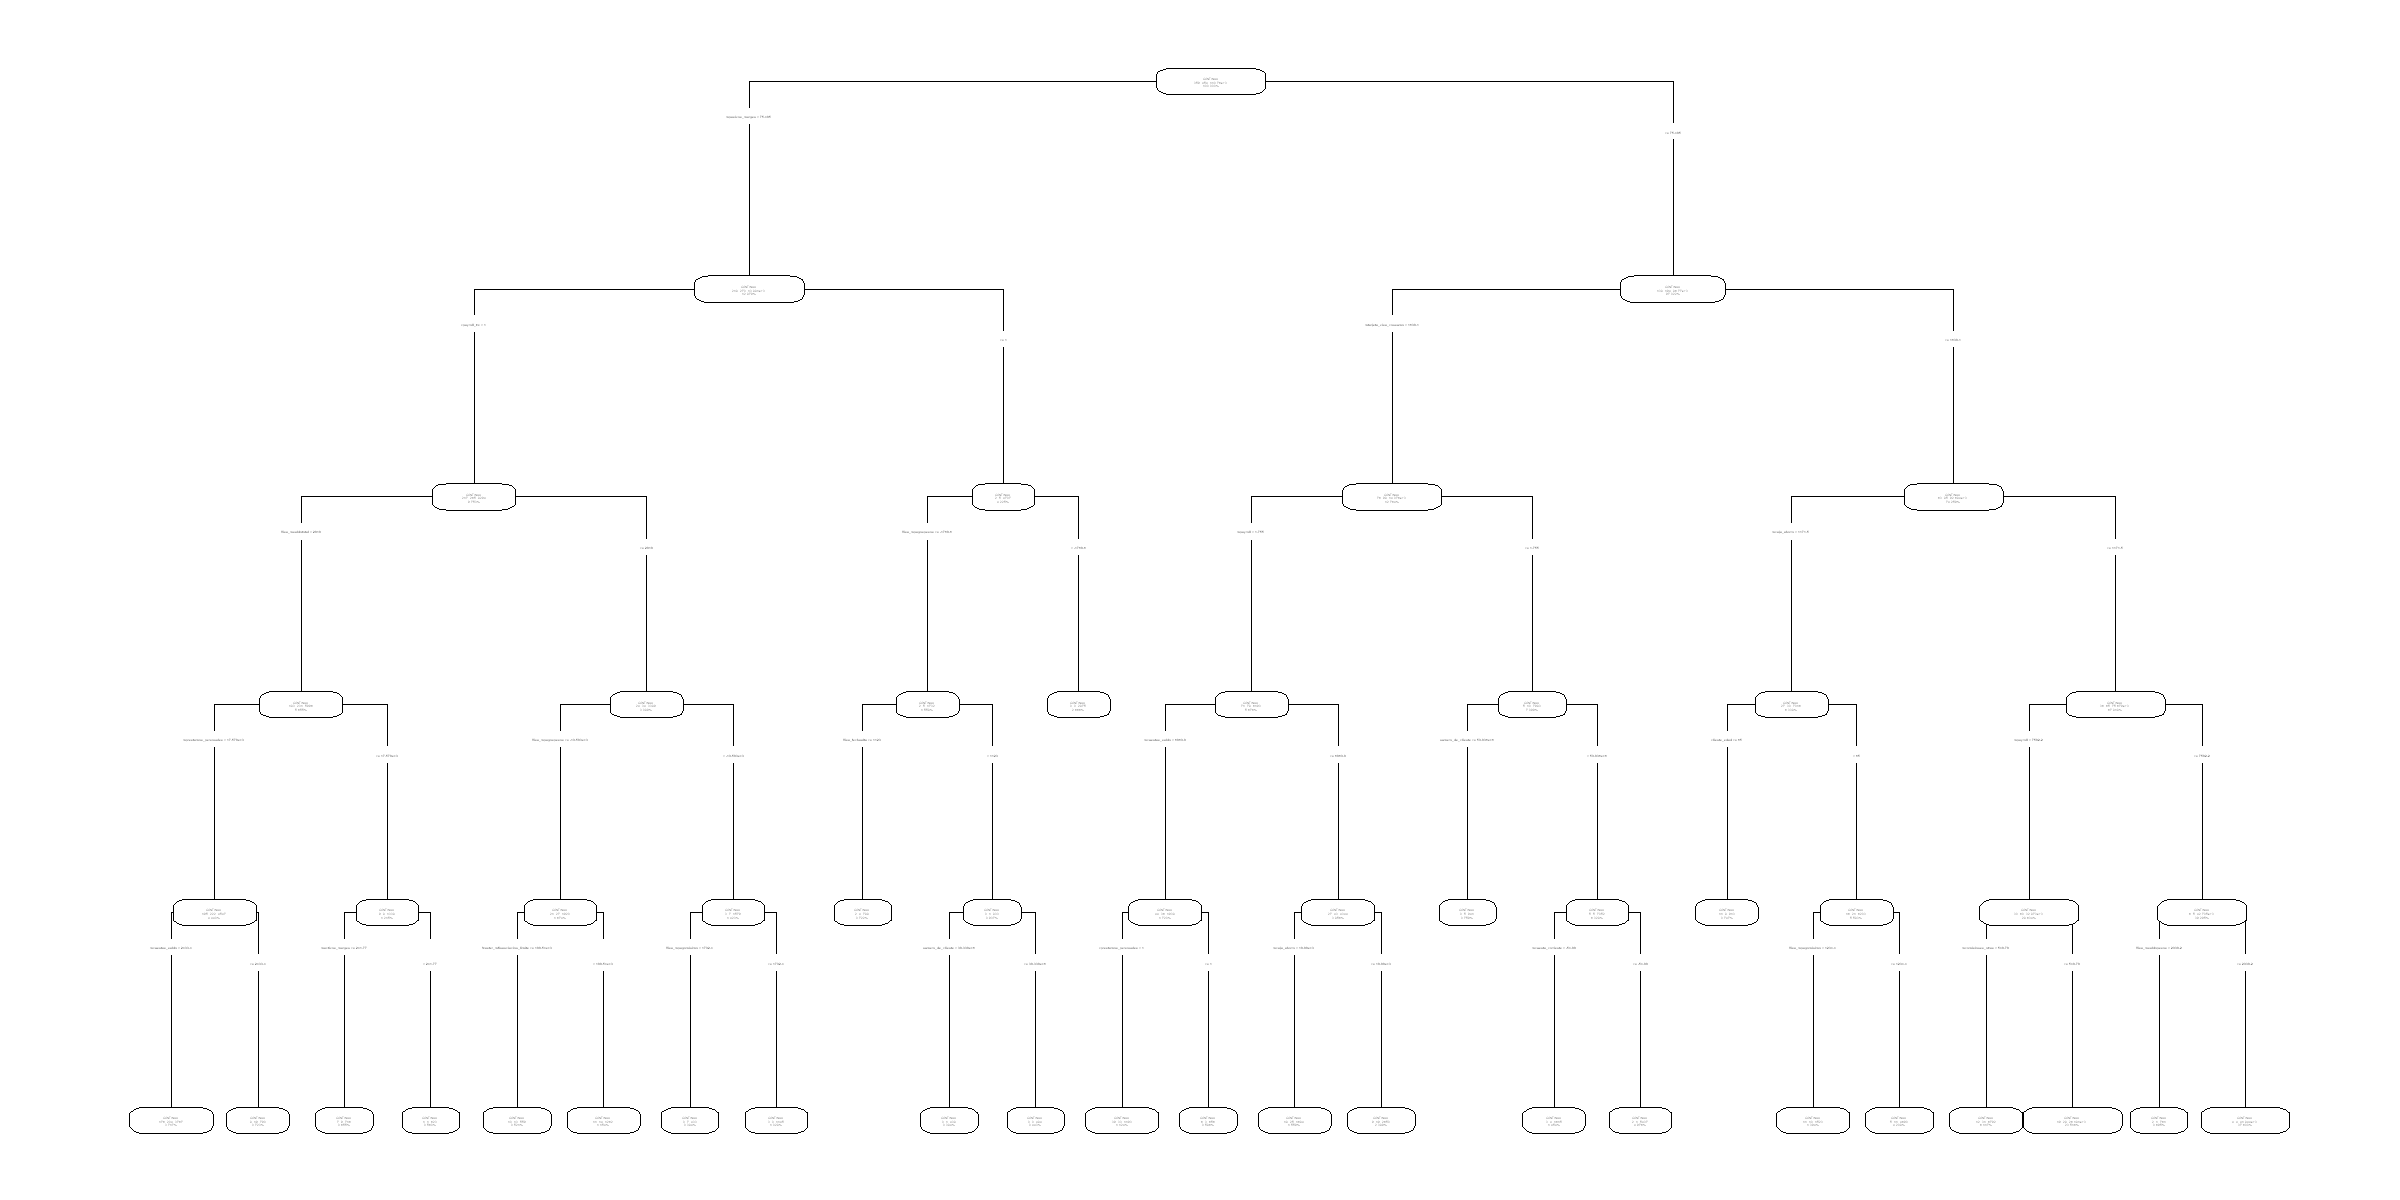

In [16]:
for(semilla in ksemillas)
{
    ganancia <- GananciaArbol(semilla, dataset, x = param, train = 0.70)
    vector_ganancias  <- c(vector_ganancias, ganancia)
}

veo que tiene  vector_ganancias

In [17]:
vector_ganancias

[1] 12713333

Calculo la media de  vector_ganancias

In [18]:
mean(vector_ganancias)

[1] 12713333